 ### Importing Libraries / Reading Dataset¶

# About Dataset
#### Survived- Survival (0 = No, 1 = Yes) ---> Output Variable
#### Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) ---> Input Variable
#### Sex - Sex of the passenger ---> Input Variable
#### Age - Age in years ---> Input Variable
#### Sibsp - number of siblings/spouses aboard the Titanic ---> Input Variable
#### Parch - number of parents/children aboard the Titanic ---> Input Variable
#### Ticket - Ticket number ---> Input Variable
#### Fare - Passenger fare ---> Input Variable
#### Cabin - Cabin number ---> Input Variable
#### Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) ---> Input Variable

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [3]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
display( test.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

#### PassengerId , Name , Ticket don't seem to have any significance thus dropping those columns. Cabin has more than 500 rows missing thus dropping that column.

In [5]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
test.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [7]:
# sum of the null in avery column
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

#### Age and Embarked columns still have few missing values, replacing Age(numerical) missing values with mean and Embarked(categorical) missing values with mode.The mode of a  set of values is the value that appears most often. It can be multiple values

In [9]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode().values[0], inplace=True)

train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
train.duplicated().sum()

116

In [13]:
train.drop_duplicates(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [14]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.describe(include=['O'])

,Sex,Embarked
count,775,775
unique,2,3
top,male,S
freq,483,562


In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.633333
1,2,0.506098
2,3,0.259352


#### Analyzing feature correlation by pivoting features against each other. (Categorical , Ordinal , Discrete)

##### Pclass - We observe significant correlation (>0.5) among Pclass=1,2 and Survived (classifying #3).

##### Sex - We confirm the observation that Sex=female had very high survival rate at 74%

##### SibSp / Parch - These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features


In [17]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.739726
1,male,0.215321


In [18]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.532338
2,0.444444
0,0.381890
3,0.285714
4,0.166667
5,0.000000
8,0.000000


In [19]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.552632
2,0.533333
0,0.373030
5,0.200000
4,0.000000
6,0.000000


## Data Visualization

In [20]:
cat_cols = list(train.select_dtypes(include='O').columns)
num_cols = list(train.select_dtypes(exclude='O').columns)
num_cols.remove('Survived')

print(cat_cols, num_cols)

['Sex', 'Embarked'] ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [21]:
cat_cols =['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
num_cols = ['Age', 'Fare']

### Plotting Values for each Feature

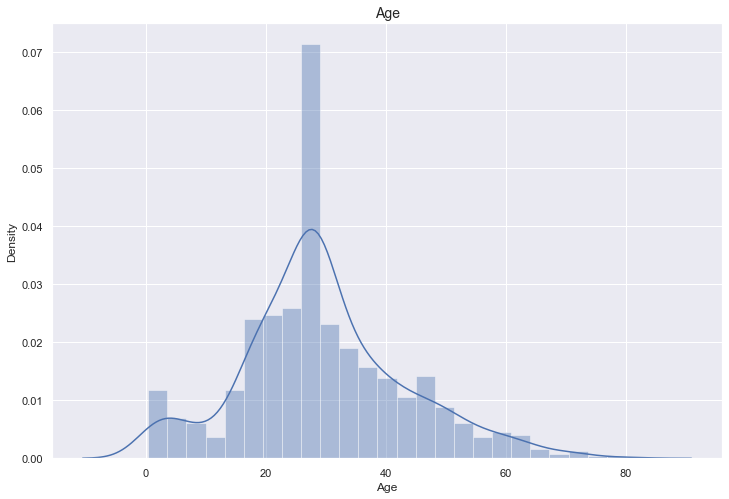

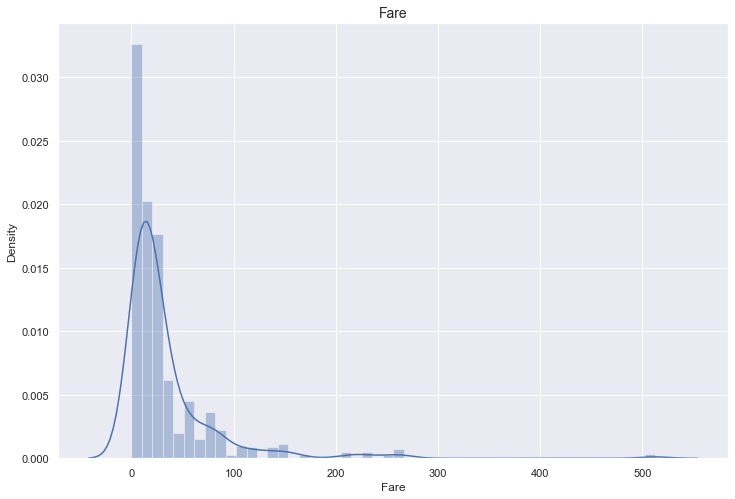

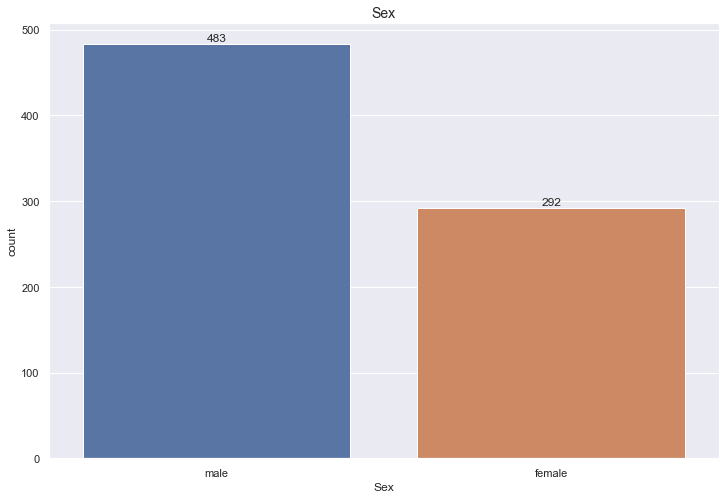

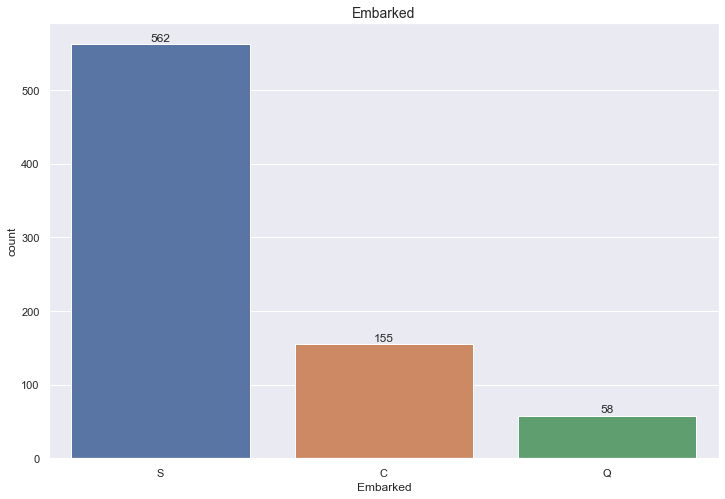

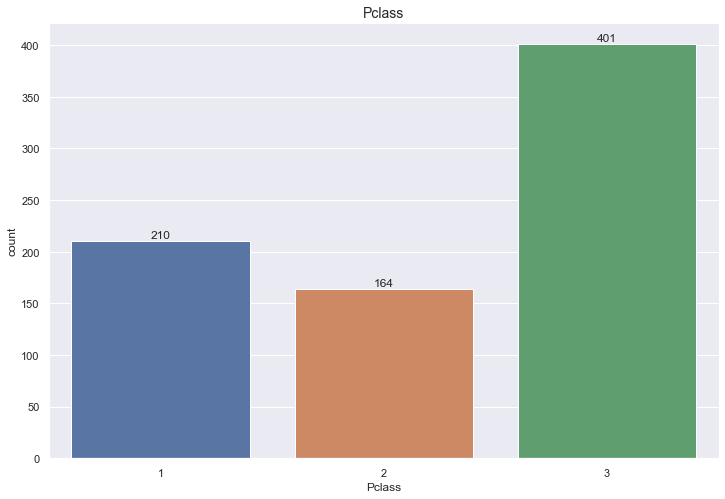

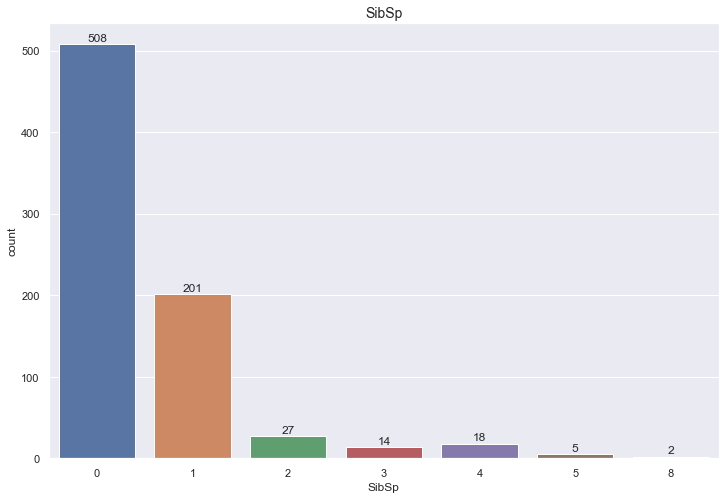

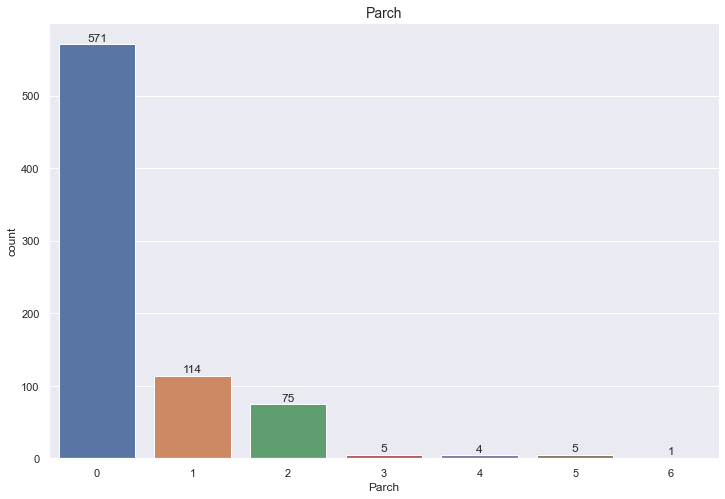

In [22]:
sns.set()

for n in num_cols:
    plt.figure(figsize=(12,8))
    sns.distplot(train[n])
    plt.title(f'{n}' , size=14)
    plt.show()
    
for c in cat_cols:
    plt.figure(figsize=(12,8))
    ax = sns.countplot(train[c])
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', padding=1)
        
    plt.title(f'{c}' , size=14)
    plt.show()

Text(0.5, 1.0, 'Male/Female Ages')

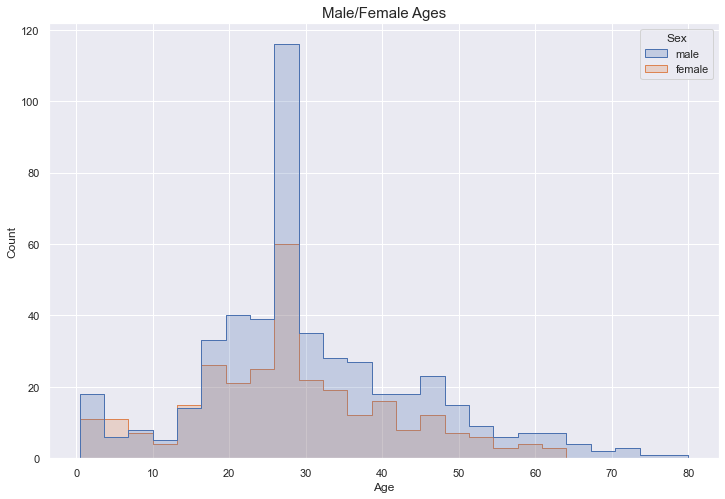

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(x=train.Age, hue=train.Sex, element='step')
plt.title('Male/Female Ages', size=15)

### Relationship between each feature and target variable (Survived)

<Figure size 1296x864 with 0 Axes>

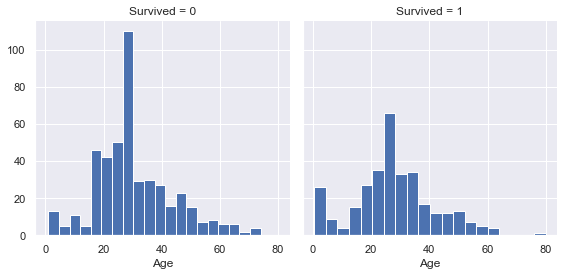

<Figure size 1296x864 with 0 Axes>

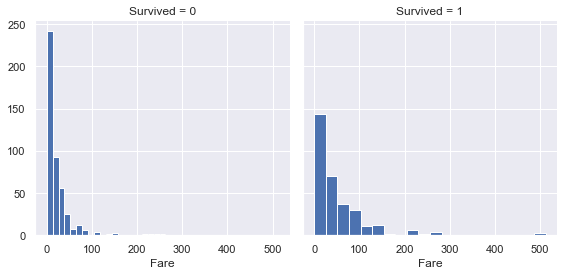

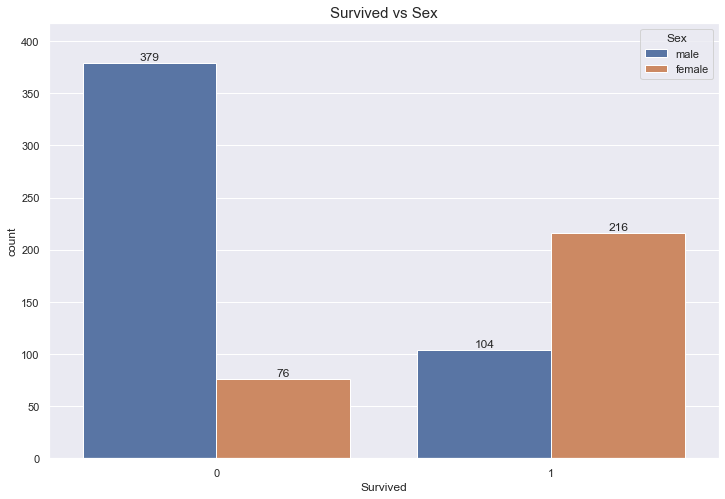

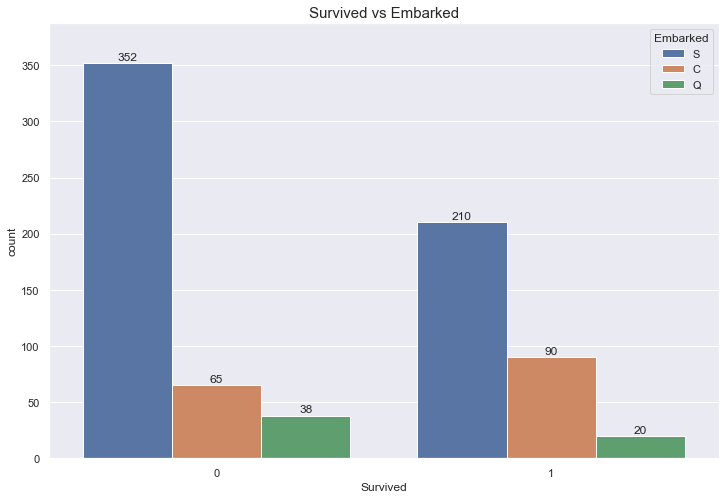

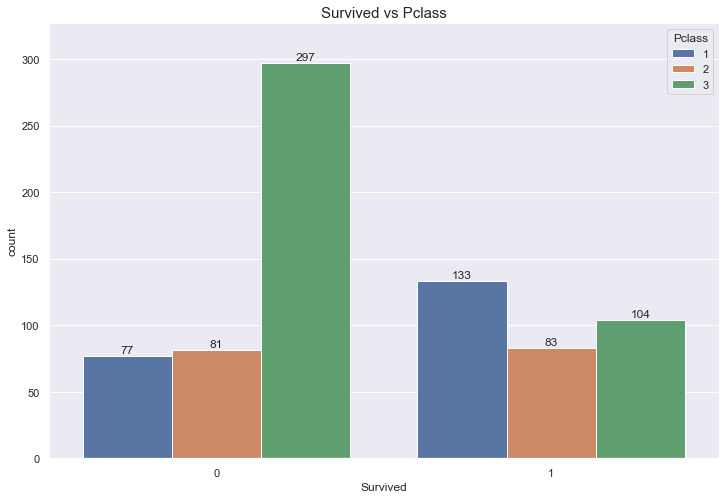

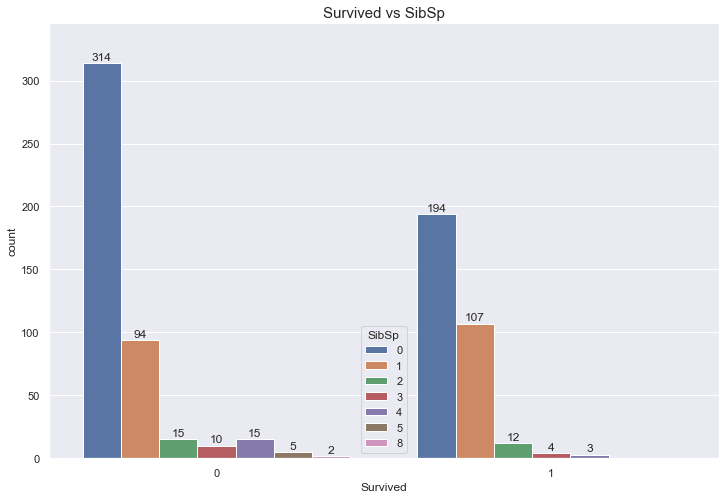

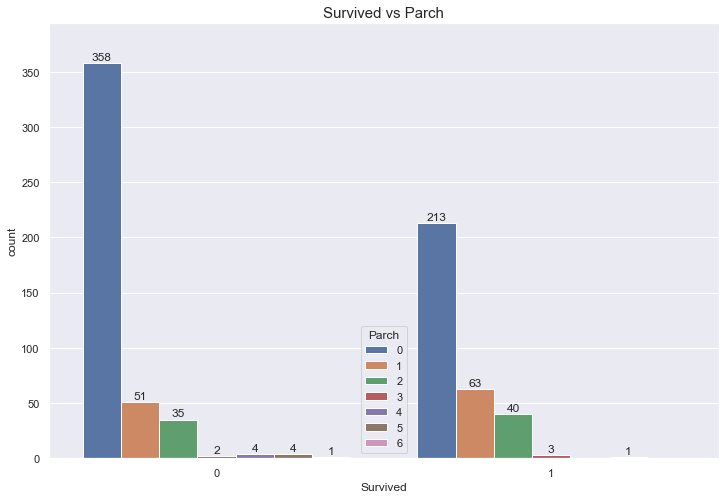

In [24]:
for n in num_cols:
    plt.figure(figsize=(18, 12))
    g = sns.FacetGrid(train, col='Survived', size=4)
    g.map(plt.hist,n ,bins=20)
    
for c in cat_cols:
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=train.Survived, hue=train[c])
    
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', padding=1)
        
        ax.margins(y=0.1)
        
        plt.title(f"Survived vs {c}", size=15)

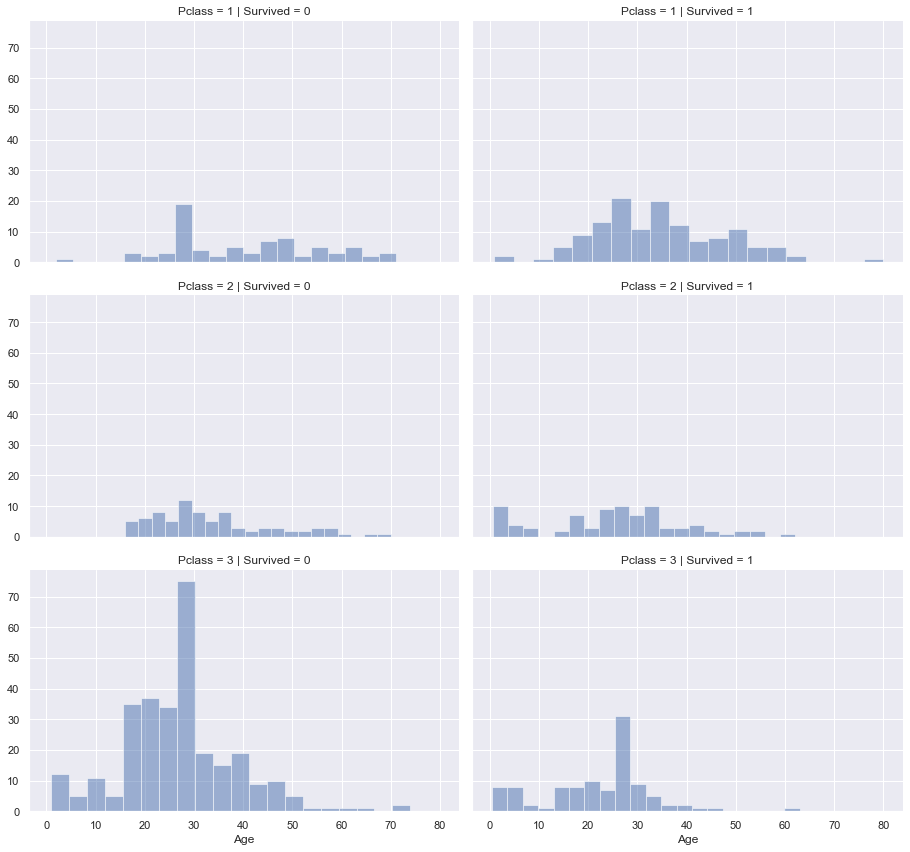

In [25]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
plt.show()

#### Pclass=3 had most passengers, however most did not survive.I
#### nfant passengers in Pclass=2 and Pclass=3 mostly survived.
#### Most passengers in Pclass=1 survived.
#### Pclass varies in terms of Age distribution of passengers.

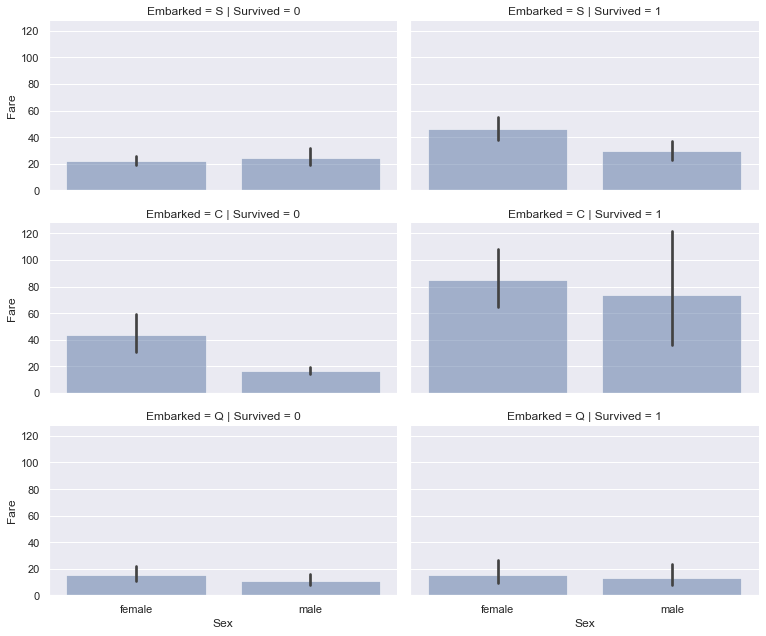

In [26]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=3, aspect=1.8)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5)
plt.show()

##### Higher fare paying passengers had better survival.
##### Port of embarkation correlates with survival rates.

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.331388 -0.078114 -0.037841  0.069864  0.247159
Pclass   -0.331388  1.000000 -0.342745  0.087050  0.038998 -0.554649
Age      -0.078114 -0.342745  1.000000 -0.279316 -0.182697  0.092503
SibSp    -0.037841  0.087050 -0.279316  1.000000  0.379535  0.133807
Parch     0.069864  0.038998 -0.182697  0.379535  1.000000  0.190823
Fare      0.247159 -0.554649  0.092503  0.133807  0.190823  1.000000


<AxesSubplot:>

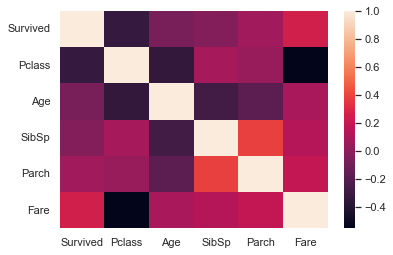

In [27]:
print(train.corr())
sns.heatmap(train.corr())

## FE

In [28]:
#FOR TRAIN DATA
train['FamilySize'] = train['SibSp'] + train['Parch']
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
3,0.714286
2,0.574257
1,0.551948
0,0.336384
6,0.333333
4,0.230769
5,0.136364
7,0.000000
10,0.000000


In [29]:
train['IsAlone'] = train['FamilySize'].apply(lambda x: 0 if x>0 else 1)
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
IsAlone,
0,0.511834
1,0.336384


In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [31]:
# FOR TEST DATA

test['FamilySize'] = test['SibSp'] + test['Parch']
test['IsAlone'] = test['FamilySize'].apply(lambda x: 0 if x>0 else 1)

test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,male,34.5,0,0,7.8292,Q,0,1
1,3,female,47.0,1,0,7.0000,S,1,0
2,2,male,62.0,0,0,9.6875,Q,0,1
3,3,male,27.0,0,0,8.6625,S,0,1
4,3,female,22.0,1,1,12.2875,S,2,0


            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.331388 -0.078114 -0.037841  0.069864  0.247159   
Pclass     -0.331388  1.000000 -0.342745  0.087050  0.038998 -0.554649   
Age        -0.078114 -0.342745  1.000000 -0.279316 -0.182697  0.092503   
SibSp      -0.037841  0.087050 -0.279316  1.000000  0.379535  0.133807   
Parch       0.069864  0.038998 -0.182697  0.379535  1.000000  0.190823   
Fare        0.247159 -0.554649  0.092503  0.133807  0.190823  1.000000   
FamilySize  0.013954  0.078134 -0.282479  0.859784  0.798767  0.192341   
IsAlone    -0.176714  0.113778  0.190270 -0.607809 -0.569387 -0.245168   

            FamilySize   IsAlone  
Survived      0.013954 -0.176714  
Pclass        0.078134  0.113778  
Age          -0.282479  0.190270  
SibSp         0.859784 -0.607809  
Parch         0.798767 -0.569387  
Fare          0.192341 -0.245168  
FamilySize    1.000000 -0.709533  
IsAlone      -0.709533  1.000000  


<AxesSubplot:>

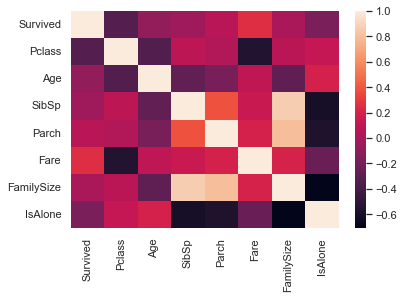

In [32]:
print(train.corr())
sns.heatmap(train.corr())

In [33]:
df = train.copy()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [34]:
# Dropping FamilySize, sibSp and Parch due to correlation with IsAlone

train.drop(columns=['Parch', 'FamilySize', 'SibSp'], axis=1, inplace=True)
test.drop(columns=['Parch', 'FamilySize', 'SibSp'], axis=1, inplace=True)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


## Data Preprocessing 

In [35]:
X = train.drop('Survived', axis=1)
y = train['Survived']

##### One Hot Encoding 

In [36]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])
X.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,0,1,0,0,1
1,1,38.0,71.2833,0,1,0,1,0,0
2,3,26.0,7.9250,1,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,1
4,3,35.0,8.0500,1,0,1,0,0,1


In [37]:
# FOR TEST DATA

test = pd.get_dummies(test, columns=['Sex', 'Embarked'])
test.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,0,1,0,1,0
1,3,47.0,7.0000,0,1,0,0,0,1
2,2,62.0,9.6875,1,0,1,0,1,0
3,3,27.0,8.6625,1,0,1,0,0,1
4,3,22.0,12.2875,0,1,0,0,0,1


#### Scaling/Standardizing Data

In [38]:
sc = StandardScaler()

X[['Age', 'Fare']] = sc.fit_transform(X[['Age', 'Fare']])
X.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.551060,-0.527515,0,0,1,0,0,1
1,1,0.611945,0.695086,0,1,0,1,0,0
2,3,-0.260308,-0.514627,1,1,0,0,0,1
3,1,0.393881,0.347909,0,1,0,0,0,1
4,3,0.393881,-0.512240,1,0,1,0,0,1


In [39]:
#FOR TEST DATA

test[['Age', 'Fare']] = sc.fit_transform(test[['Age', 'Fare']])
test.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.386231,-0.498407,1,0,1,0,1,0
1,3,1.371370,-0.513274,0,1,0,0,0,1
2,2,2.553537,-0.465088,1,0,1,0,1,0
3,3,-0.204852,-0.483466,1,0,1,0,0,1
4,3,-0.598908,-0.418471,0,1,0,0,0,1


##### Splitting DATA

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modelling

##### check this notebook for parameter tuning and cross validation -> 
##### https://www.kaggle.com/kenjee/titanic-project-example/notebook

# Tuned Random Forest Classifier

In [41]:
# param_grid_rfc = {"max_depth": [None],
#                   "max_features": [1, 3, 10],
#                   "min_samples_split": [2, 3, 10],
#                   "min_samples_leaf": [1, 4, 10],
#                   "n_estimators" :[100, 200, 500]}

# grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5, scoring="accuracy", verbose=0, n_jobs=-1)

# grid_rf.fit(X_train, y_train)

In [42]:
# rfc_params = grid_rf.best_params_

rf = RandomForestClassifier()   #(**rfc_params)
rf.fit(X_train, y_train)

rfpred = rf.predict(X_test)

rfscore = accuracy_score(y_test , rfpred)
print('Accuracy Score = ' , rfscore)

Accuracy Score =  0.7783505154639175


In [44]:
from sklearn.metrics import classification_report, roc_curve, auc

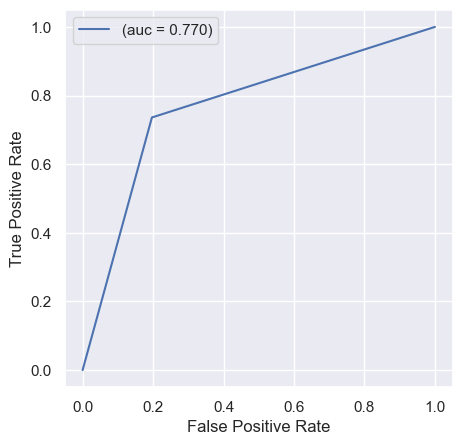

In [46]:
fpr, tpr, threshold = roc_curve(y_test, rfpred)
rfauc = auc(fpr, tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label = '(auc = %0.3f)' % rfauc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [54]:
def f_importances(model, model_name):
    f_imp = pd.DataFrame({'Feature Importances': model.feature_importances_}, index=X.columns)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=f_imp['Feature Importances'], y=f_imp.index)
    plt.title(f"{model_name} Feature Importences", size=15)
    plt.show()

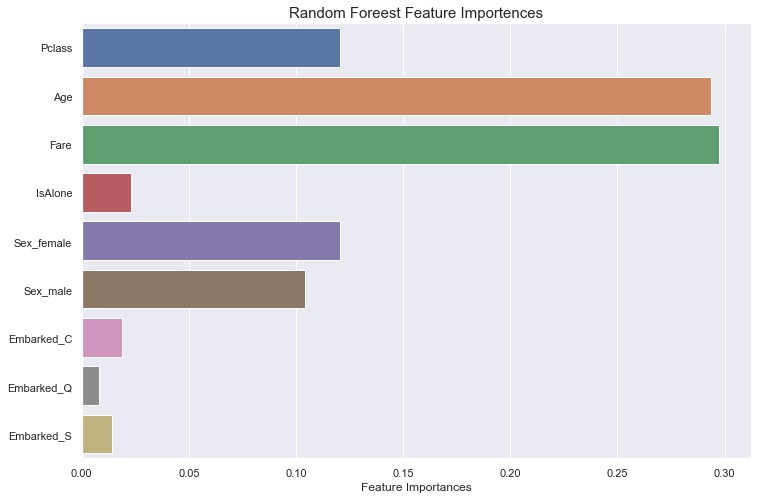

In [55]:
f_importances(rf, "Random Foreest")

## SVM rbf Kernel

In [59]:
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)

pred1 = svc1.predict(X_test)

score1 = accuracy_score(y_test, pred1)

print('Accuracy Score =', score1)

Accuracy Score = 0.845360824742268


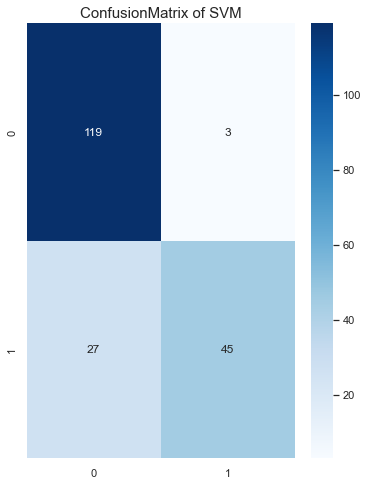

In [63]:
plt.figure(figsize=(6,8))
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, cmap="Blues", fmt='d')
plt.title("ConfusionMatrix of SVM", size=15)
plt.show()

In [64]:
from sklearn.metrics import classification_report, roc_curve, auc

In [66]:
report1 = classification_report(y_test, pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       122
           1       0.94      0.62      0.75        72

    accuracy                           0.85       194
   macro avg       0.88      0.80      0.82       194
weighted avg       0.86      0.85      0.84       194



In [67]:
roc_auc_score(y_test, pred1)

0.8002049180327868

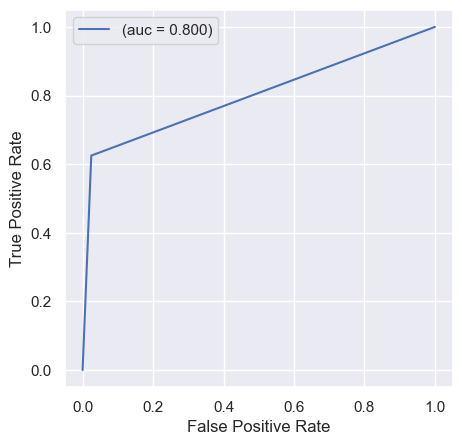

In [69]:
fpr, tpr, threshold = roc_curve(y_test, pred1)
auc1 = auc(fpr, tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='(auc = %0.3f)' % auc1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 2D Plot for rbf Kernel SVM

In [74]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [75]:
XX = X_train[['Fare' , 'Age']] # we only take the first two features , as doing 2d plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


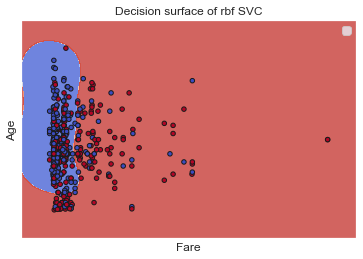

In [77]:
model = SVC(kernel='rbf')
clf = model.fit(XX, y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of rbf SVC')
# Set-up grid for plotting.
X0, X1 = XX.iloc[:, 0], XX.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Age')
ax.set_xlabel('Fare')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## SVM Polynomial degree 3 kernel

In [78]:
svc3 = SVC(kernel='poly' , degree=3)
svc3.fit(X_train , y_train)

pred3 = svc3.predict(X_test)

score3 = accuracy_score(y_test , pred3)

print('Accuracy Score = ' , score3)

Accuracy Score =  0.865979381443299


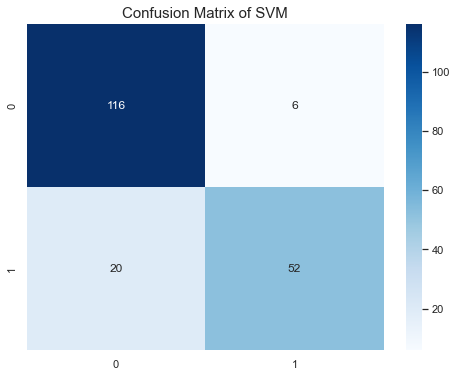

In [79]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, pred3), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of SVM", size=15)
plt.show()

In [80]:
report3 = classification_report(y_test , pred3)

print(report3)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       122
           1       0.90      0.72      0.80        72

    accuracy                           0.87       194
   macro avg       0.87      0.84      0.85       194
weighted avg       0.87      0.87      0.86       194



In [81]:
roc_auc_score(y_test,pred3)

0.8365209471766848

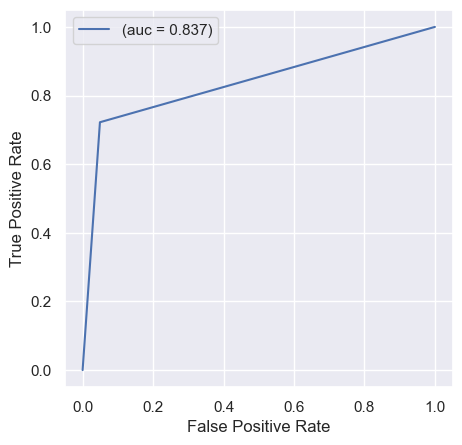

In [82]:
fpr,tpr,threshold =roc_curve(y_test,pred3)
auc3 = auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Plotting 2d Polynomial SVC

TypeError: set_ticks() missing 1 required positional argument: 'ticks'

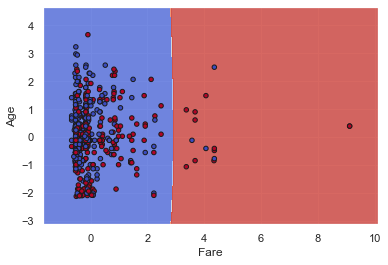

In [84]:
model = SVC(kernel='poly' , degree=3)
clf = model.fit(XX, y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Polynomial SVC degree 3')
# Set-up grid for plotting.
X0, X1 = XX.iloc[:, 0], XX.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Age')
ax.set_xlabel('Fare')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Testing and Submission

In [89]:
final_svc = SVC(kernel='poly' , degree=3)
final_svc.fit(X , y)

final_pred = final_svc.predict(test)

In [90]:
test_sub = pd.read_csv('test.csv')

submission = pd.DataFrame({
        "PassengerId": test_sub["PassengerId"],
        "Survived": final_pred
        })

submission.to_csv('submission.csv', index=False)